In [51]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import yaml
import itertools
import matplotlib as mpl

In [47]:
def rm_color_cats(c_dict, order, cats):
    if cats:
        keys = c_dict.keys()
        pop_list = []
        for key in keys:
            if key not in cats:
                pop_list.append(key)
        for p in pop_list:
            del c_dict[p]
        order = [o for o in order if o in cats]
    return c_dict, order

def get_feat_triplet_colors_2(cats=None):
    tss = '#56B4E9'
    tes = '#E69F00'
    splicing = '#CC79A7'
    triplet = '#009E73'
    c_dict = {'tss': tss,
              'ic': splicing,
              'tes': tes,
              'iso': triplet}
    order = ['iso', 'tss', 'ic', 'tes']

    c_dict, order = rm_color_cats(c_dict, order, cats)
    return c_dict, order

def get_sector_colors(cats=None):
    tss = '#56B4E9'
    tes = '#E69F00'
    splicing = '#CC79A7'
    simple = '#000000'
    c_dict = {'tss': tss,
              'splicing': splicing,
              'tes': tes,
              'simple': simple,
              'mixed': '#b7b7b7'}
    order = ['tss', 'splicing', 'tes', 'mixed', 'simple']

    c_dict, order = rm_color_cats(c_dict, order, cats)
    return c_dict, order

def get_sector_disp_colors(cats=None):
    tss = '#56B4E9'
    tes = '#E69F00'
    splicing = '#CC79A7'
    simple = '#000000'
    c_dict = {'TSS': tss,
              'Splicing': splicing,
              'TES': tes,
              'Simple': simple,
              'Mixed': '#b7b7b7'}
    order = ['TSS', 'Splicing', 'TES', 'Mixed', 'Simple']
    return c_dict, order
c_dict, order = get_sector_colors()
disp_order = ['TSS', 'Splicing', 'TES', 'Mixed', 'Simple']
disp_map = {}
for o in order:
    if o == 'tes' or o == 'tss':
        disp_map[o] = o.upper()
    else:
        disp_map[o] = o.capitalize()
c_dict, order = get_sector_disp_colors()

## correlation summary

In [43]:
files = ['sector_char_tsvs/intron_len_per_sect.tsv',
         'sector_char_tsvs/mean_n_intron.tsv']
entries = ['log_mean_intron_len', 'mean_n_intron']
m = {'n_iso': 'triplet', 'n_tss': 'tss', 'n_ic': 'ic', 'n_tes':'tes'}
df = pd.DataFrame()
for f, e in zip(files, entries):
    temp = pd.read_csv(f, sep='\t')
    for feat in ['iso', 'tss', 'ic', 'tes']:
        temp2 = temp[[e, f'n_{feat}']]
        temp2 = temp2.loc[~(temp2[e].isnull())]
        temp2.columns = [e, feat]
        a = temp2[feat].tolist()
        b = temp2[e].tolist()
        r, p = st.pearsonr(a,b)
        temp3 = pd.DataFrame()
        temp3['feat'] = [feat]
        temp3['pearson_r'] = [r]
        temp3['pval'] = [p]
        temp3['variable'] = [e]
        df = pd.concat([df, temp3], axis=0)

/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

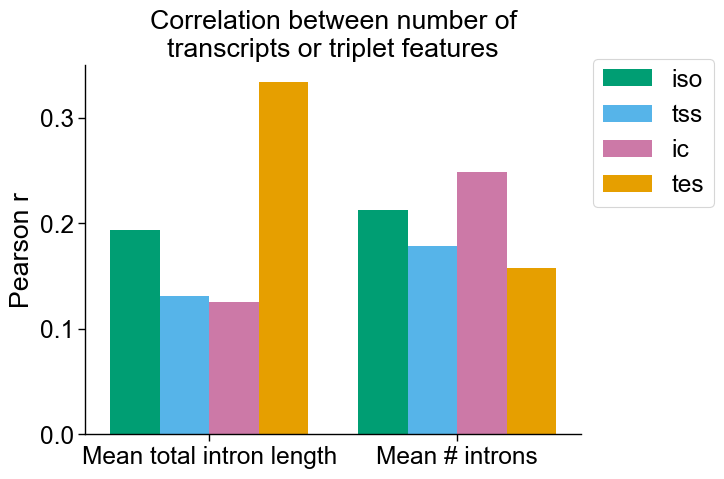

In [58]:
c_dict, order = get_feat_triplet_colors_2()

sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
ax = sns.barplot(df, y='pearson_r', x='variable', hue='feat',
                 hue_order=order, palette=c_dict,
                 saturation=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel='', ylabel='Pearson r', title='Correlation between number of\ntranscripts or triplet features')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Mean total intron length'
labels[1] = 'Mean # introns'
ax.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1, 1.05))

plt.savefig('figures/intron_feat_corr_summary.pdf', dpi=500)

In [59]:
df = pd.read_csv('sector_char_tsvs/intron_len_per_sect.tsv', sep='\t')
for s in df.sector.unique():
    print(f"{s}: {df.loc[df.sector==s, 'mean_intron_len'].median()}")

tes: 30535.86931818182
simple: 9371.5
mixed: 18389.5
tss: 14826.0
splicing: 11306.666666666666


/var/folders/ch/bc1lrgbd1fn_3gxz886mxjz00000gn/T/ipykernel_70552/2630461905.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df, y='log_mean_intron_len', x='sect_disp', order=order, palette=c_dict, fill=False)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fairlie

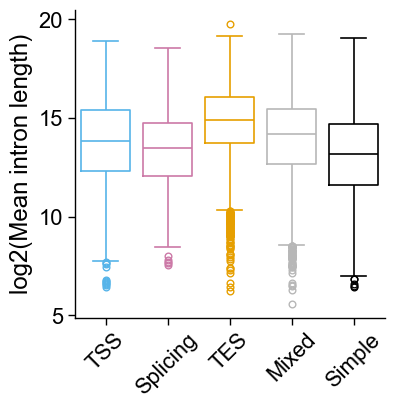

In [64]:
c_dict, order = get_sector_disp_colors()
sns.set_context('paper', font_scale=1.8)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(4,4))

df = pd.read_csv('sector_char_tsvs/intron_len_per_sect.tsv', sep='\t')
df['sect_disp'] = df.sector.map(disp_map)
ax = sns.boxplot(df, y='log_mean_intron_len', x='sect_disp', order=order, palette=c_dict, fill=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabel = ''
ylabel = 'log2(Mean intron length)'
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
ax.tick_params(axis="x", rotation=45)


plt.savefig('figures/intron_len_per_sect.pdf', bbox_inches='tight')

In [65]:
df = pd.read_csv('sector_char_tsvs/mean_n_intron.tsv', sep='\t')
for s in df.sector.unique():
    print(f"{s}: {df.loc[df.sector==s, 'mean_n_intron'].median()}")

tes: 6.066666666666666
simple: 4.0
mixed: 6.0
tss: 6.2727272727272725
splicing: 6.5


/var/folders/ch/bc1lrgbd1fn_3gxz886mxjz00000gn/T/ipykernel_70552/2698407674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df, y='mean_n_intron', x='sect_disp', order=order, palette=c_dict, fill=False)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fairliereese/

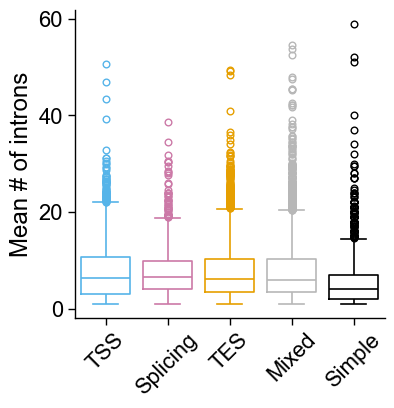

In [66]:
c_dict, order = get_sector_disp_colors()
sns.set_context('paper', font_scale=1.8)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(4,4))

df['sect_disp'] = df.sector.map(disp_map)
ax = sns.boxplot(df, y='mean_n_intron', x='sect_disp', order=order, palette=c_dict, fill=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabel = ''
ylabel = 'Mean # of introns'
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
ax.tick_params(axis="x", rotation=45)


plt.savefig('figures/mean_n_intron.pdf', bbox_inches='tight')

In [13]:
df = pd.read_csv('sector_char_tsvs/mean_n_intron.tsv', sep='\t')
df.head()

,Unnamed: 0,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm,gene_id,mean_n_intron
0,0,obs_major,ENSG00000000003,1.0,5.0,3.0,11.0,1.000000,0.142857,0.714286,0.142857,tes,TSPAN6,NaN,NaN,ENSG00000000003,6.419355
1,1,obs_major,ENSG00000000005,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,TNMD,NaN,NaN,ENSG00000000005,4.000000
2,2,obs_major,ENSG00000000419,2.0,2.0,7.0,8.0,3.500000,0.266667,0.266667,0.466667,mixed,DPM1,NaN,NaN,ENSG00000000419,7.100000
3,3,obs_major,ENSG00000000457,2.0,3.0,4.0,6.0,1.600000,0.303030,0.454545,0.242424,mixed,SCYL3,NaN,NaN,ENSG00000000457,11.777778
4,4,obs_major,ENSG00000000460,2.0,4.0,5.0,8.0,1.666667,0.260870,0.521739,0.217391,tes,C1orf112,NaN,NaN,ENSG00000000460,21.842105


/var/folders/ch/bc1lrgbd1fn_3gxz886mxjz00000gn/T/ipykernel_70552/979207168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df, y='mean_n_intron', x='sect_disp', order=order, palette=c_dict, fill=False)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fairliereese/m

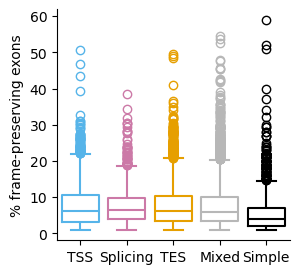

In [14]:
plt.figure(figsize=(3,3))
df['sect_disp'] = df.sector.map(disp_map)
ax = sns.boxplot(df, y='mean_n_intron', x='sect_disp', order=order, palette=c_dict, fill=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabel = ''
ylabel = '% frame-preserving exons'
_ = ax.set(xlabel=xlabel, ylabel=ylabel)

plt.savefig('figures/perc_frame_pres_exon.pdf', bbox_inches='tight')

In [15]:
df = pd.read_csv('sector_char_tsvs/mean_perc_cons.tsv', sep='\t')


/var/folders/ch/bc1lrgbd1fn_3gxz886mxjz00000gn/T/ipykernel_70552/420361941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df, y='mean_perc_cons', x='sect_disp', order=order, palette=c_dict, fill=False)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fairliereese/miniconda3/envs/new_plotting/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fairliereese/

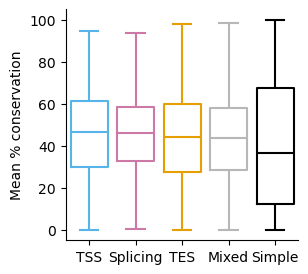

In [16]:
plt.figure(figsize=(3,3))
df['sect_disp'] = df.sector.map(disp_map)
ax = sns.boxplot(df, y='mean_perc_cons', x='sect_disp', order=order, palette=c_dict, fill=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabel = ''
ylabel = 'Mean % conservation'
_ = ax.set(xlabel=xlabel, ylabel=ylabel)

plt.savefig('figures/mean_perc_cons.pdf', bbox_inches='tight')